In [4]:
import pandas as pd 
import numpy as np 
import statistics as st
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [5]:
sales = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/SuperstoreSalesDataset/train.csv")

In [6]:
sales.columns
sales.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [7]:
sales.drop("Row ID", axis = 1, inplace = True)
sales.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales'],
      dtype='object')

In [9]:
sales.rename(columns = {'Order ID' : 'order_id', 'Order Date' : 'order_date', 'Ship Date' : 'ship_date', 'Ship Mode' : 'ship_mode',
                        'Customer ID' : 'customer_id', 'Customer Name' : 'customer_name',
                        'Postal Code' : 'postal_code', 'Product ID' : 'product_id', 'Sub-Category' : 'sub_category',
                        'Product Name' : 'product_name'}, inplace = True)

In [10]:
sales.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
Segment           0
Country           0
City              0
State             0
postal_code      11
Region            0
product_id        0
Category          0
sub_category      0
product_name      0
Sales             0
dtype: int64

In [11]:
sales_city = sales.groupby('City').agg({'Sales' : sum})
sales_city.columns
sales_city.sort_values(by = 'Sales', ascending = False).head(10)

,Sales
City,
New York City,252462.5470
Los Angeles,173420.1810
Seattle,116106.3220
San Francisco,109041.1200
Philadelphia,108841.7490
Houston,63956.1428
Chicago,47820.1330
San Diego,47521.0290
Jacksonville,44713.1830


In [12]:
sales_region = sales.groupby('Region').agg({'Sales' : sum})
sales_region

,Sales
Region,
Central,492646.9132
East,669518.7260
South,389151.4590
West,710219.6845


In [13]:
count_region = sales.groupby('Region').agg({'Sales' : 'count'})
count_region

,Sales
Region,
Central,2277
East,2785
South,1598
West,3140


<AxesSubplot:title={'center':'Region-wise Orders'}, xlabel='Region'>

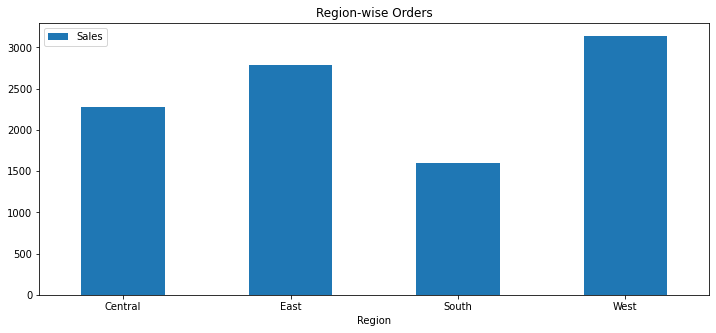

In [14]:
count_region.plot(kind = 'bar',
                  figsize = (12,5),
                  title = 'Region-wise Orders',
                  rot = 0)

In [16]:
reg_st = sales.groupby(['Region', 'State']).agg({'Sales' : 'count'})
reg_st.head(20)

Sales
Region  State                      
Central Illinois                483
        Indiana                 135
        Iowa                     26
        Kansas                   24
        Michigan                253
        Minnesota                89
        Missouri                 66
        Nebraska                 38
        North Dakota              7
        Oklahoma                 66
        South Dakota             12
        Texas                   973
        Wisconsin               105
East    Connecticut              82
        Delaware                 93
        District of Columbia     10
        Maine                     8
        Maryland                105
        Massachusetts           135
        New Hampshire            27

In [17]:
cat_per = sales.groupby(['Category', 'sub_category']).agg({'Sales' : sum})
cat_per.sort_values(by = 'Sales', ascending = False).groupby('Category').head(2).sort_index()

Sales
Category        sub_category            
Furniture       Chairs        322822.731
                Tables        202810.628
Office Supplies Binders       200028.785
                Storage       219343.392
Technology      Machines      189238.631
                Phones        327782.448

In [18]:
sales.dtypes
sales['order_date'] = pd.to_datetime(sales['order_date'], dayfirst = True)
sales['ship_date'] = pd.to_datetime(sales['ship_date'], dayfirst = True)
sales['shipment_in_days'] = sales['ship_date'] - sales['order_date']
sales['shipment_in_days'] = sales['shipment_in_days'].dt.days
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,Segment,Country,City,State,postal_code,Region,product_id,Category,sub_category,product_name,Sales,shipment_in_days
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7


In [19]:
sales['year'] = sales['order_date'].dt.year
sales['month'] = sales['order_date'].dt.month_name()
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,Segment,Country,City,State,postal_code,Region,product_id,Category,sub_category,product_name,Sales,shipment_in_days,year,month
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,2017,November
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,2017,November
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2017,June
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,2016,October
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,2016,October


<AxesSubplot:title={'center':'Monthly Sales'}, xlabel='month'>

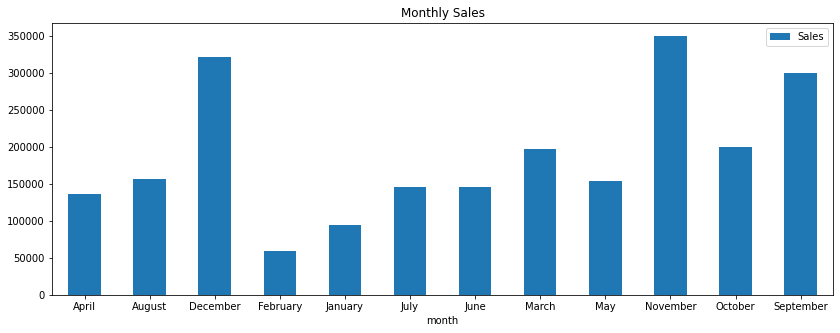

In [20]:
monthly_sales = sales.groupby('month').agg({'Sales' : sum})
# plotting monthly sales

monthly_sales.plot(kind = 'bar',
                   title = 'Monthly Sales',
                   figsize = (14,5),
                   rot = 0) # September, November and december have highest sales

<AxesSubplot:title={'center':'Monthly Sales'}, xlabel='month'>

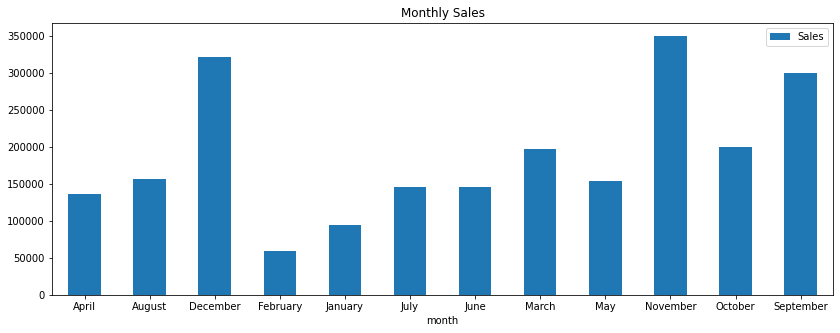

In [21]:
monthly_sales = sales.groupby('month').agg({'Sales' : sum})
# plotting monthly sales

monthly_sales.plot(kind = 'bar',
                   title = 'Monthly Sales',
                   figsize = (14,5),
                   rot = 0) # September, November and december have highest sales

In [22]:
st.mean(sales['shipment_in_days']) # 3.96
st.median(sales['shipment_in_days']) # 4

4.0

<AxesSubplot:xlabel='order_date'>

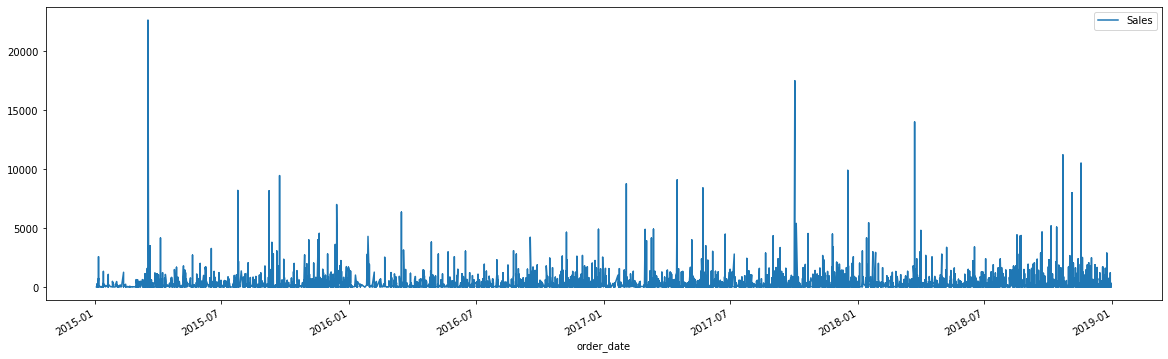

In [23]:
sales.plot(x = 'order_date',
           y = 'Sales',
           figsize = (20,6))

In [24]:
delayed_orders = sales.loc[sales['shipment_in_days'] > 5]
delayed_orders.head()

# filtering orders getting shipped on time

timely_orders = sales.loc[~(sales['shipment_in_days'] > 5)]
timely_orders.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,Segment,Country,City,State,postal_code,Region,product_id,Category,sub_category,product_name,Sales,shipment_in_days,year,month
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,3,2017,November
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,2017,November
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,4,2017,June
5,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,5,2015,June
6,CA-2015-115812,2015-06-09,2015-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.28,5,2015,June


In [25]:
sales['is_delay'] = [True if s > 5 else False for s in sales['shipment_in_days']]
sales.head()

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,Segment,Country,City,State,...,Region,product_id,Category,sub_category,product_name,Sales,shipment_in_days,year,month,is_delay
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,2017,November,False
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,2017,November,False
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2017,June,False
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,2016,October,True
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,2016,October,True


<AxesSubplot:title={'center':'Timely vs Delayed'}>

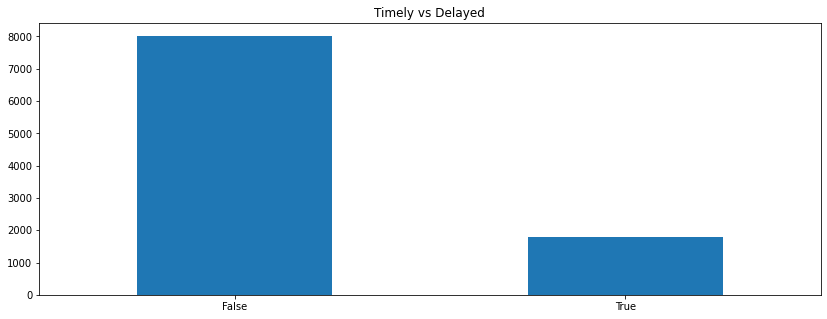

In [26]:
sales['is_delay'].value_counts().plot(kind = 'bar',
           figsize = (14,5),
           title = 'Timely vs Delayed',
           rot = 0)

In [27]:
avg_ord = delayed_orders.groupby('order_date').agg({'Sales' : 'count'})
st.mean(avg_ord['Sales'])

3.0775862068965516

In [28]:
avg_ord_time = timely_orders.groupby('order_date').agg({'Sales' : 'count'})
st.mean(avg_ord_time['Sales'])

6.763713080168777

In [29]:
avg_ticket_size_delayed = delayed_orders.groupby('order_date').agg({'Sales' : sum})
st.mean(avg_ticket_size_delayed['Sales']) # 690

# avg ticket size for timely orders
avg_ticket_size_timely = timely_orders.groupby('order_date').agg({'Sales' : sum})
st.mean(avg_ticket_size_timely['Sales']) 

1571.0147767088608

In [30]:
first_purchase = sales.sort_values(by = 'order_date').groupby('customer_id').first()
last_purchase = sales.sort_values(by = 'order_date', ascending = False).groupby('customer_id').first()
first_purchase.head()

,order_id,order_date,ship_date,ship_mode,customer_name,Segment,Country,City,State,postal_code,Region,product_id,Category,sub_category,product_name,Sales,shipment_in_days,year,month,is_delay
customer_id,,,,,,,,,,,,,,,,,,,,
AA-10315,CA-2015-128055,2015-03-31,2015-04-05,Standard Class,Alex Avila,Consumer,United States,San Francisco,California,94122.0,West,OFF-AP-10002765,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,5,2015,March,False
AA-10375,CA-2015-158064,2015-04-21,2015-04-25,Standard Class,Allen Armold,Consumer,United States,Los Angeles,California,90008.0,West,OFF-BI-10002976,Office Supplies,Binders,ACCOHIDE Binder by Acco,16.520,4,2015,April,False
AA-10480,CA-2015-155271,2015-05-04,2015-05-04,Same Day,Andrew Allen,Consumer,United States,Middletown,Connecticut,6457.0,East,FUR-FU-10001473,Furniture,Furnishings,DAX Wood Document Frame,27.460,0,2015,May,False
AA-10645,CA-2015-154963,2015-06-22,2015-06-27,Standard Class,Anna Andreadi,Consumer,United States,Chester,Pennsylvania,19013.0,East,FUR-CH-10004698,Furniture,Chairs,"Padded Folding Chairs, Black, 4/Carton",170.058,5,2015,June,False
AB-10015,CA-2015-152905,2015-02-18,2015-02-24,Standard Class,Aaron Bergman,Consumer,United States,Arlington,Texas,76017.0,Central,OFF-ST-10000321,Office Supplies,Storage,Akro Stacking Bins,12.624,6,2015,February,True


In [31]:
last_purchase.head()

,order_id,order_date,ship_date,ship_mode,customer_name,Segment,Country,City,State,postal_code,Region,product_id,Category,sub_category,product_name,Sales,shipment_in_days,year,month,is_delay
customer_id,,,,,,,,,,,,,,,,,,,,
AA-10315,CA-2018-147039,2018-06-29,2018-07-04,Standard Class,Alex Avila,Consumer,United States,Minneapolis,Minnesota,55407.0,Central,OFF-BI-10004654,Office Supplies,Binders,Avery Binding System Hidden Tab Executive Styl...,11.540,5,2018,June,False
AA-10375,CA-2018-100230,2018-12-11,2018-12-15,Standard Class,Allen Armold,Consumer,United States,New York City,New York,10035.0,East,OFF-BI-10002498,Office Supplies,Binders,Clear Mylar Reinforcing Strips,14.952,4,2018,December,False
AA-10480,CA-2018-114412,2018-04-15,2018-04-20,Standard Class,Andrew Allen,Consumer,United States,Concord,North Carolina,28027.0,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,5,2018,April,False
AA-10645,CA-2018-157196,2018-11-05,2018-11-09,Standard Class,Anna Andreadi,Consumer,United States,San Diego,California,92105.0,West,OFF-PA-10003172,Office Supplies,Paper,Xerox 1996,12.960,4,2018,November,False
AB-10015,CA-2017-140935,2017-11-10,2017-11-12,First Class,Aaron Bergman,Consumer,United States,Oklahoma City,Oklahoma,73120.0,Central,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",341.960,2,2017,November,False


In [32]:
customer = pd.merge(first_purchase, last_purchase, how = 'inner', on = ['customer_id'])
customer.shape
customer.columns

Index(['order_id_x', 'order_date_x', 'ship_date_x', 'ship_mode_x',
       'customer_name_x', 'Segment_x', 'Country_x', 'City_x', 'State_x',
       'postal_code_x', 'Region_x', 'product_id_x', 'Category_x',
       'sub_category_x', 'product_name_x', 'Sales_x', 'shipment_in_days_x',
       'year_x', 'month_x', 'is_delay_x', 'order_id_y', 'order_date_y',
       'ship_date_y', 'ship_mode_y', 'customer_name_y', 'Segment_y',
       'Country_y', 'City_y', 'State_y', 'postal_code_y', 'Region_y',
       'product_id_y', 'Category_y', 'sub_category_y', 'product_name_y',
       'Sales_y', 'shipment_in_days_y', 'year_y', 'month_y', 'is_delay_y'],
      dtype='object')

In [33]:
customer = customer[['order_date_x', 'order_date_y']]
customer.head()
customer.reset_index(inplace = True)
customer.head()

,customer_id,order_date_x,order_date_y
0,AA-10315,2015-03-31,2018-06-29
1,AA-10375,2015-04-21,2018-12-11
2,AA-10480,2015-05-04,2018-04-15
3,AA-10645,2015-06-22,2018-11-05
4,AB-10015,2015-02-18,2017-11-10


In [34]:
customer.rename(columns = {'order_date_x' : 'first_purchase', 'order_date_y' : 'last_purchase'}, inplace = True)
customer.head(10)

,customer_id,first_purchase,last_purchase
0,AA-10315,2015-03-31,2018-06-29
1,AA-10375,2015-04-21,2018-12-11
2,AA-10480,2015-05-04,2018-04-15
3,AA-10645,2015-06-22,2018-11-05
4,AB-10015,2015-02-18,2017-11-10
5,AB-10060,2016-09-18,2018-11-06
6,AB-10105,2015-12-20,2018-11-19
7,AB-10150,2015-03-05,2018-11-19
8,AB-10165,2015-11-16,2018-12-05
9,AB-10255,2015-07-22,2018-07-17


In [35]:
customer['retention'] = customer['last_purchase'] - customer['first_purchase']
customer['retention'] = customer['retention'].dt.days
customer['retention'] = round(customer['retention']/365, 2)
customer.head(10)

,customer_id,first_purchase,last_purchase,retention
0,AA-10315,2015-03-31,2018-06-29,3.25
1,AA-10375,2015-04-21,2018-12-11,3.64
2,AA-10480,2015-05-04,2018-04-15,2.95
3,AA-10645,2015-06-22,2018-11-05,3.38
4,AB-10015,2015-02-18,2017-11-10,2.73
5,AB-10060,2016-09-18,2018-11-06,2.13
6,AB-10105,2015-12-20,2018-11-19,2.92
7,AB-10150,2015-03-05,2018-11-19,3.71
8,AB-10165,2015-11-16,2018-12-05,3.05
9,AB-10255,2015-07-22,2018-07-17,2.99


In [36]:
number_of_orders = sales.groupby('customer_id').agg({'Sales' : 'count'})
number_of_orders.head()
customer['no_of_orders'] = list(number_of_orders['Sales']) # cannot assign a series to a column in dataframe
customer.head(20)

,customer_id,first_purchase,last_purchase,retention,no_of_orders
0,AA-10315,2015-03-31,2018-06-29,3.25,11
1,AA-10375,2015-04-21,2018-12-11,3.64,15
2,AA-10480,2015-05-04,2018-04-15,2.95,12
3,AA-10645,2015-06-22,2018-11-05,3.38,18
4,AB-10015,2015-02-18,2017-11-10,2.73,6
5,AB-10060,2016-09-18,2018-11-06,2.13,18
6,AB-10105,2015-12-20,2018-11-19,2.92,20
7,AB-10150,2015-03-05,2018-11-19,3.71,12
8,AB-10165,2015-11-16,2018-12-05,3.05,14
9,AB-10255,2015-07-22,2018-07-17,2.99,14


In [37]:
avg_rev = sales.groupby('customer_id').agg({'Sales' : np.mean})
customer['average_revenue'] = list(avg_rev['Sales'])
customer.head(20)

,customer_id,first_purchase,last_purchase,retention,no_of_orders,average_revenue
0,AA-10315,2015-03-31,2018-06-29,3.25,11,505.778182
1,AA-10375,2015-04-21,2018-12-11,3.64,15,70.426000
2,AA-10480,2015-05-04,2018-04-15,2.95,12,149.209333
3,AA-10645,2015-06-22,2018-11-05,3.38,18,282.607500
4,AB-10015,2015-02-18,2017-11-10,2.73,6,147.692667
5,AB-10060,2016-09-18,2018-11-06,2.13,18,430.867778
6,AB-10105,2015-12-20,2018-11-19,2.92,20,723.678550
7,AB-10150,2015-03-05,2018-11-19,3.71,12,80.559167
8,AB-10165,2015-11-16,2018-12-05,3.05,14,79.559857
9,AB-10255,2015-07-22,2018-07-17,2.99,14,65.323714
